In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os 
import math
import copy
from tqdm import tqdm
import Util as ut
import seaborn as sns
from DataLoader import GetSpectrum
import itertools
import clustering
from scipy import stats
from sklearn.cluster import KMeans
from statistics import mean, median,variance,stdev
import matplotlib.pyplot as plt
from IPython.display import display, HTML # Jupyter notebook用
import TrackFreq
import pyclustering
from pyclustering.cluster import xmeans


# all_source = [['IRAS15193+31', 'H2O'], ['IRAS16552-30', 'H2O'], ['IRAS18251-10', 'H2O'], ['IRAS18460-01', 'H2O'], ['IRAS18596+03', 'H2O'], ['IRAS19134+21', 'H2O'], ['IRAS19190+11', 'H2O'], ['OH16.3-3.0-3.0', 'H2O'], ['OH16.3-3.0', 'H2O'], ['W43A', 'H2O']]

# source = ['IRAS18286-09', 'H2O']
source = ['W43A', 'H2O']
# source = ['IRAS16552-30', 'H2O']
# source = ['IRAS19190+11', 'H2O']

# max_task_num = len(all_source)
result = []
result_label = []
num_cluster = {}
# source = all_source

# for num, source_list in enumerate(all_source):

#     print('task ' + str(num + 1) + ' / ' + str(max_task_num) + ' : ' + source_list[0] + '(' + source_list[1] + ')')
inname = os.path.join("/Users/yhamae/OneDrive/astro/FLASHING/dynamic_spectrum/" + source[0] + '_' + source[1] + '.txt')

rawdata = GetSpectrum.load_file(inname)
def sp_clu(rdata, n, min_data, max_data, tol):
    #     print(data)
        x = []
        y = []
    #     for lists in data:
        def sep_data(min_val, max_val, data1):
            lim_data = []
            for lists in data1:

                if min_val < float(lists[1]) < max_val:
                    lim_data.append(lists)
            return lim_data
    # lim_data = sep_data(125, 170)
    # lim_data = sep_data(140, 160)
#             print(data)
        data = sep_data(min_data, max_data, rdata)
        def sep_date(data):
            tmp = {}
            for lists in data:
                if not float(lists[0]) in tmp.keys():
                    tmp[float(lists[0])] = [[float(lists[1]), float(lists[2])]]
                else:
                    tmp[float(lists[0])].append([float(lists[1]), float(lists[2])])
            return tmp
        data = sep_date(data)
        for key in data.keys():

            x = np.array([[float(data[key][i][0]), float(data[key][i][1])] for i in range(0, len(data[key]))])
            tmp_result =  x.tolist()
            init_center = pyclustering.cluster.xmeans.kmeans_plusplus_initializer(x, n).initialize()
            xm = pyclustering.cluster.xmeans.xmeans(x, init_center, ccore=True, tolerance = tol, kmax = 60, criterion = pyclustering.cluster.xmeans.splitting_type.MINIMUM_NOISELESS_DESCRIPTION_LENGTH)
#                 xm = pyclustering.cluster.xmeans.xmeans(x, ccore=True, tolerance = tol, kmax = 60)
            xm.process()
            clusters = xm.get_clusters()
            print(xm.get_total_wce())
            i  = 0
            for c1 in clusters:
                for c2 in c1:
                    tmp_result[c2] = [key, tmp_result[c2][0], i]
                i += 1
            result.extend(tmp_result)
            num_cluster[key] = len(clusters)

            # Spectral
#                 x = np.array([[key, float(data[key][i][0])] for i in range(0, len(data[key]))])
#                 spec = clustering.spectral()
#                 if len(x) <= n:
#                     result1, cresult, x, y , raw_cresult= spec.fit(x, len(x))
#                 else:
#                     result1, cresult, x, y , raw_cresult= spec.fit(x, n)
#                 result.extend(cresult)






        return result, num_cluster

# result, cls_num= sp_clu(rawdata, 5, -300, 300, 0.001)
result, cls_num= sp_clu(rawdata, 5, -300, 300, 0.01)
print(cls_num)
# result, cls_num= sp_clu(rawdata, 10, -300, 300, 0.001)
# print(cls_num)
# print(result)

94.9843937626235
3.117073322922796
73.82679880992768
72.73650974446122
10.168062928537081
84.82590607994466
10.66427977986707
9.44739043924212
80.9309211188037
167.02055735793073
13.206629167454075
8.231842206780758
31.118657636156847
19.893981213116042
{58534.16407407408: 5, 58599.257743055554: 6, 58603.27943287037: 5, 58491.28775462963: 5, 58459.710694444446: 7, 58633.18792824074: 5, 58467.34684027778: 5, 58823.407372685186: 8, 58484.29447916667: 5, 58545.12548611111: 6, 58616.969988425924: 6, 58570.37099537037: 5, 58475.616111111114: 5, 58516.214050925926: 6}


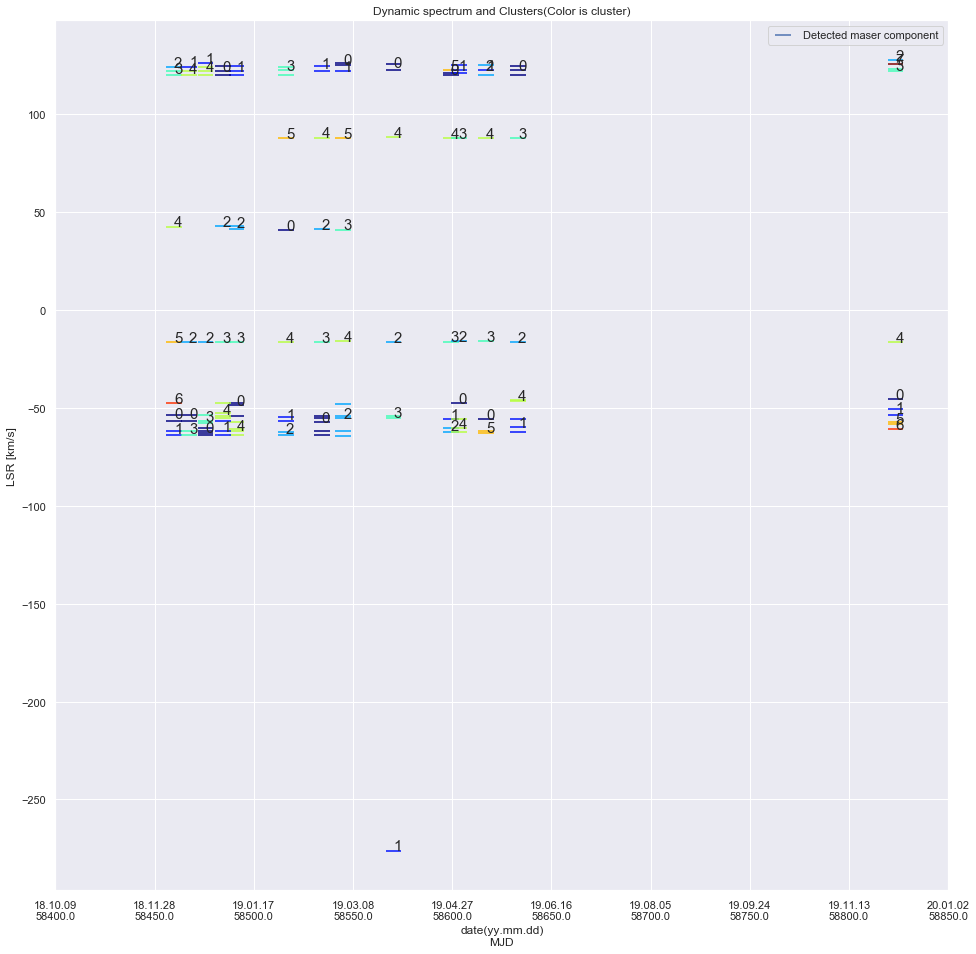

In [5]:
# lim = [100,160]
def sep_date(data):
    tmp = {}
    for lists in data:
        if not float(lists[0]) in tmp.keys():
            tmp[float(lists[0])] = [[float(lists[1]), float(lists[2])]]
        else:
            tmp[float(lists[0])].append([float(lists[1]), float(lists[2])])
    return tmp
fig = plt.figure(figsize = (16,16))
ax1 = fig.add_subplot(1,1,1)
# plt.ylim(100,200)
# plt.ylim(-100,100)

x = [float(result[i][0]) for i in range(0, len(result))]
y = [float(result[i][1]) for i in range(0, len(result))]
clabel = [float(result[i][2]) for i in range(0, len(result))]
# point_x = [float(result[i][0]) for i in range(0, len(result))]
# point_y = [float(result[i][1]) for i in range(0, len(result))]
ax1.scatter(x, y, c = clabel, cmap='jet', label = 'Detected maser component', marker = '_', s = 250)
# ax1.scatter(point_x, point_y,s=50,c='k', label = 'Clusters(x valuse add 2)')

data_dic = sep_date(result)
# print(data_dic)
for key in data_dic.keys():
    tmp_label = {}
    for lis in data_dic[key]:
        if ax1.get_ylim()[0] <= lis[0] <= ax1.get_ylim()[1]:
            if not lis[1] in tmp_label.keys():
                tmp_label[lis[1]] = [lis[0]]
            else:
                tmp_label[lis[1]].append(lis[0])
    for key2 in tmp_label.keys():
#         print(sum(tmp_label[key]) / len(tmp_label[key]),key)
        ax1.annotate(str(int(key2)), xy = (key, median(tmp_label[key2])), fontsize = 15)
    
ax1.set_xlabel('date(yy.mm.dd)\nMJD')
ax1.set_ylabel('LSR [km/s]')
ax1.set_title('Dynamic spectrum and Clusters(Color is cluster)')
ax1.legend()
# plt.rcParams['font.family'] = 'Times New Roman'
plt.xticks(list(plt.xticks())[0], [ut.mjd2datetime(int(s)).strftime("%y.%m.%d") + '\n' + str(s) for s in list(plt.xticks())[0]])
# plt.savefig('/Users/yhamae/OneDrive/astro/FLASHING/clustering/result_spectralclustering.pdf', bbox_inches="tight")

plt.show()


Average P = 0.5839819810352592


/Users/yhamae/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:168: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


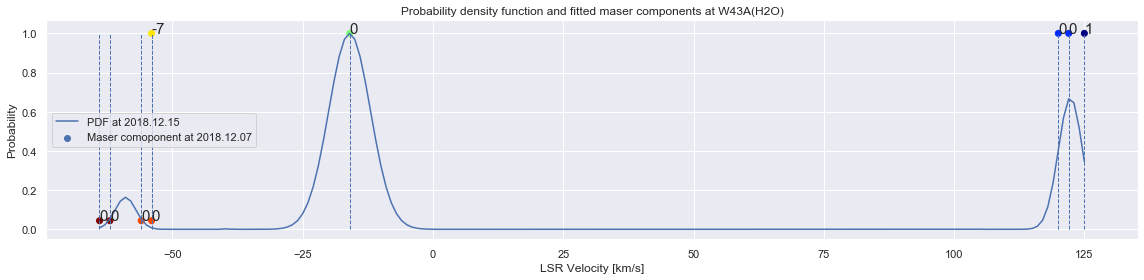

Change: 0, 0, 0, -7, 0, 0, 0, 0, 1


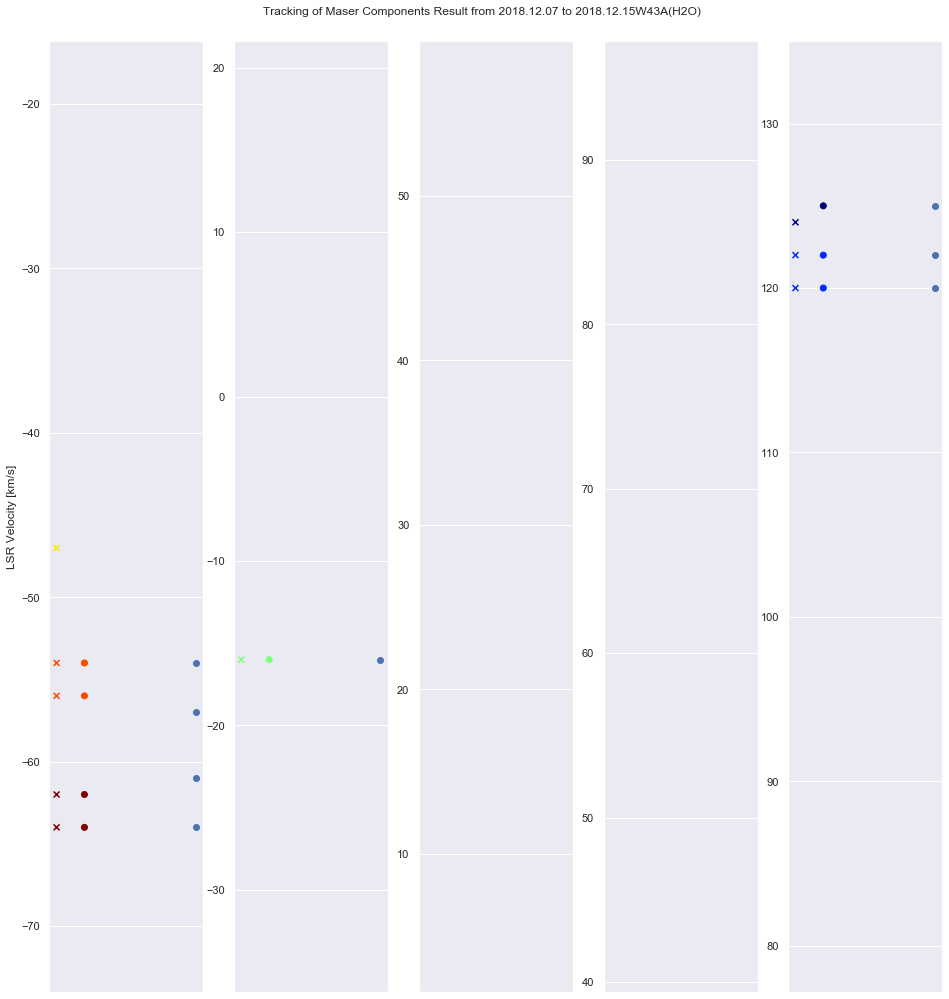

Average P = 1.0


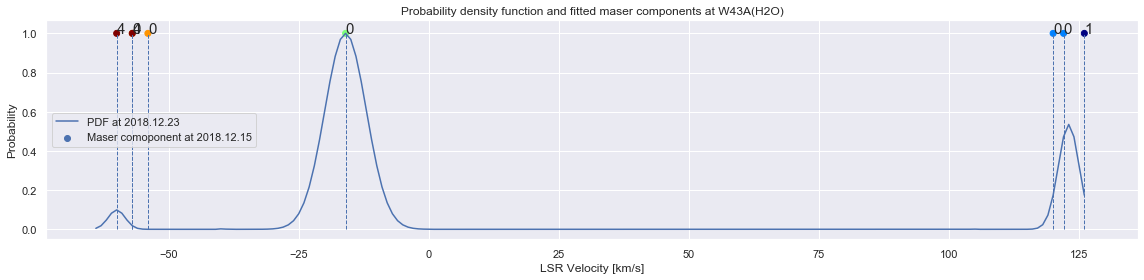

Change: 4, 0, 4, 0, 0, 0, 0, 1


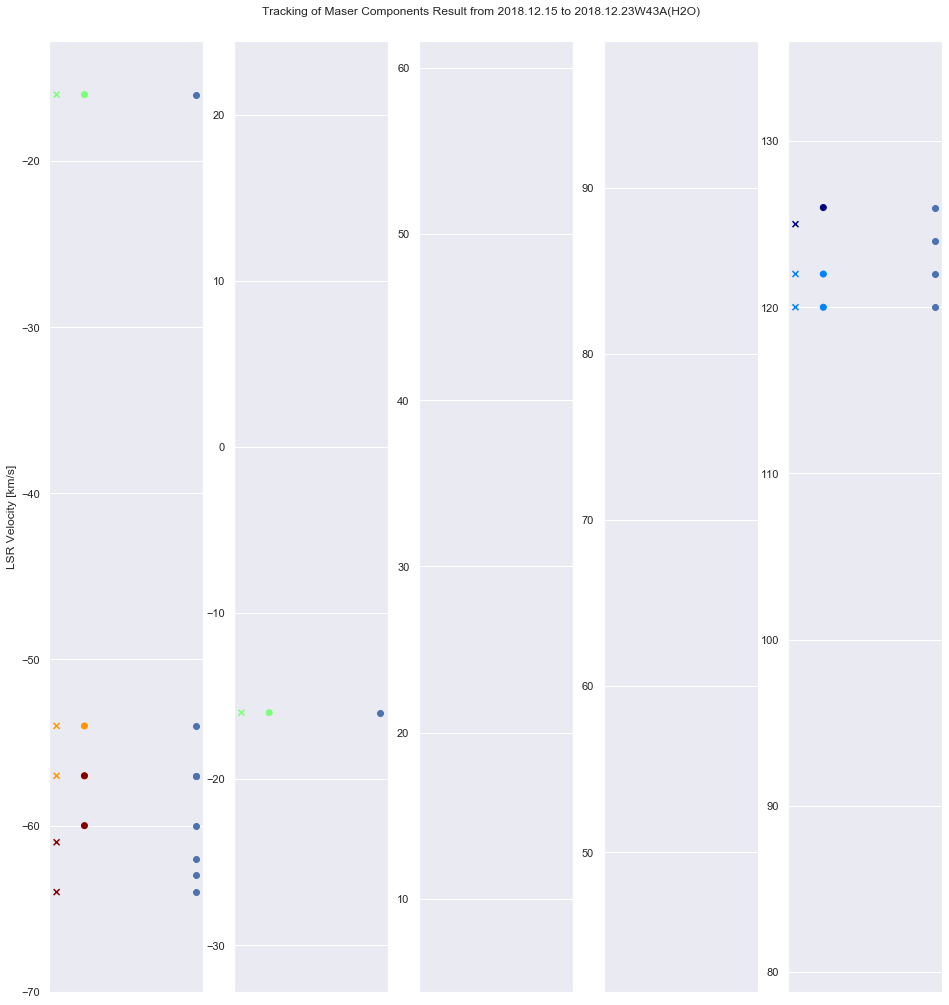

Average P = 0.41757551877999743


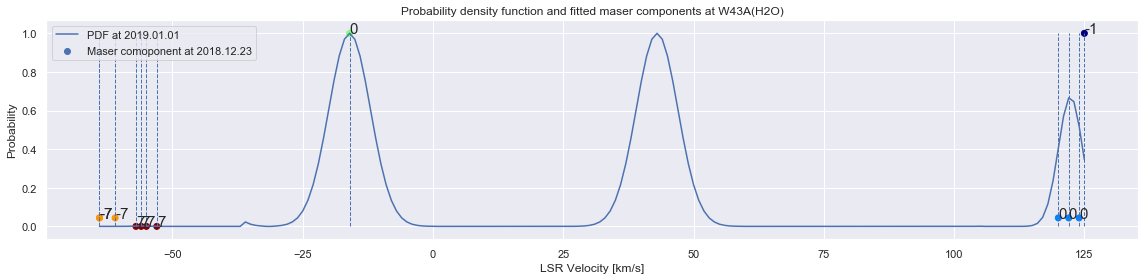

Change: -7, -7, -7, 7, 7, 7, 7, 0, 0, 0, 0, -1


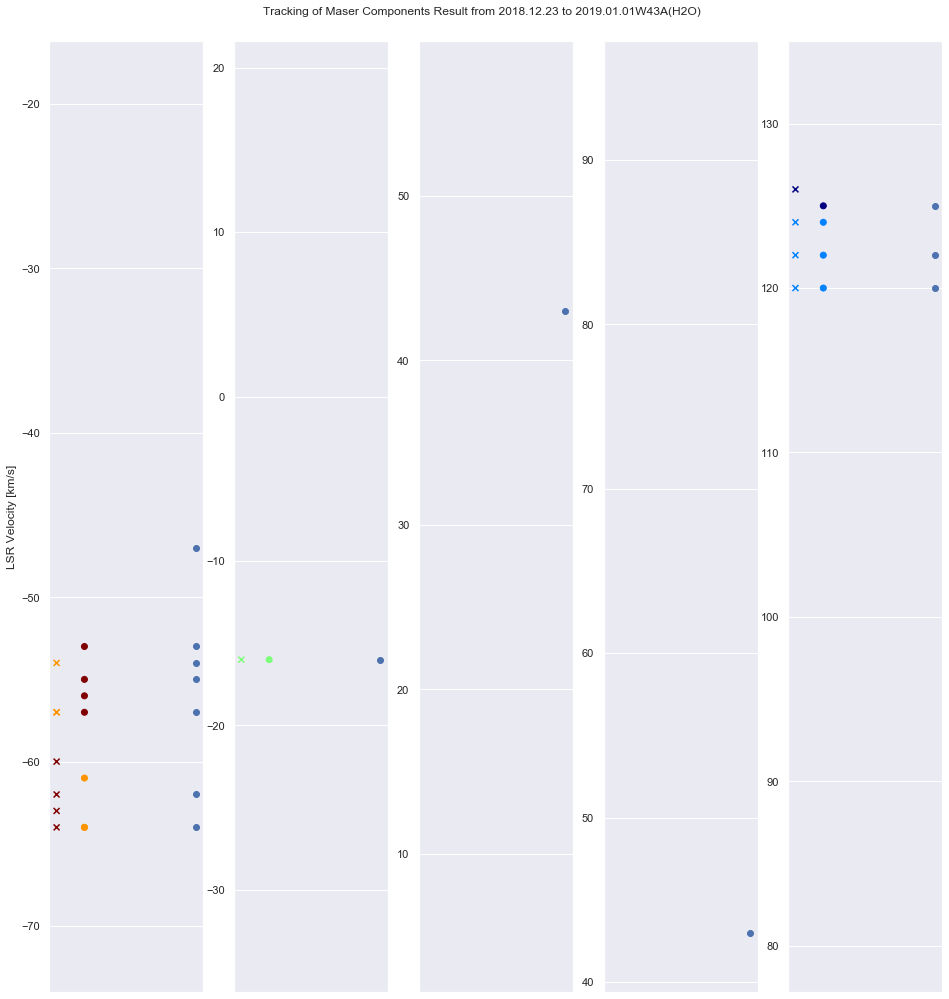

Average P = 0.6088043503717308


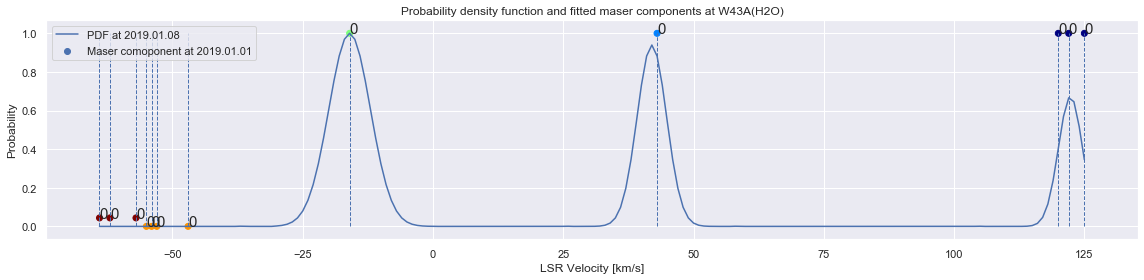

Change: 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0


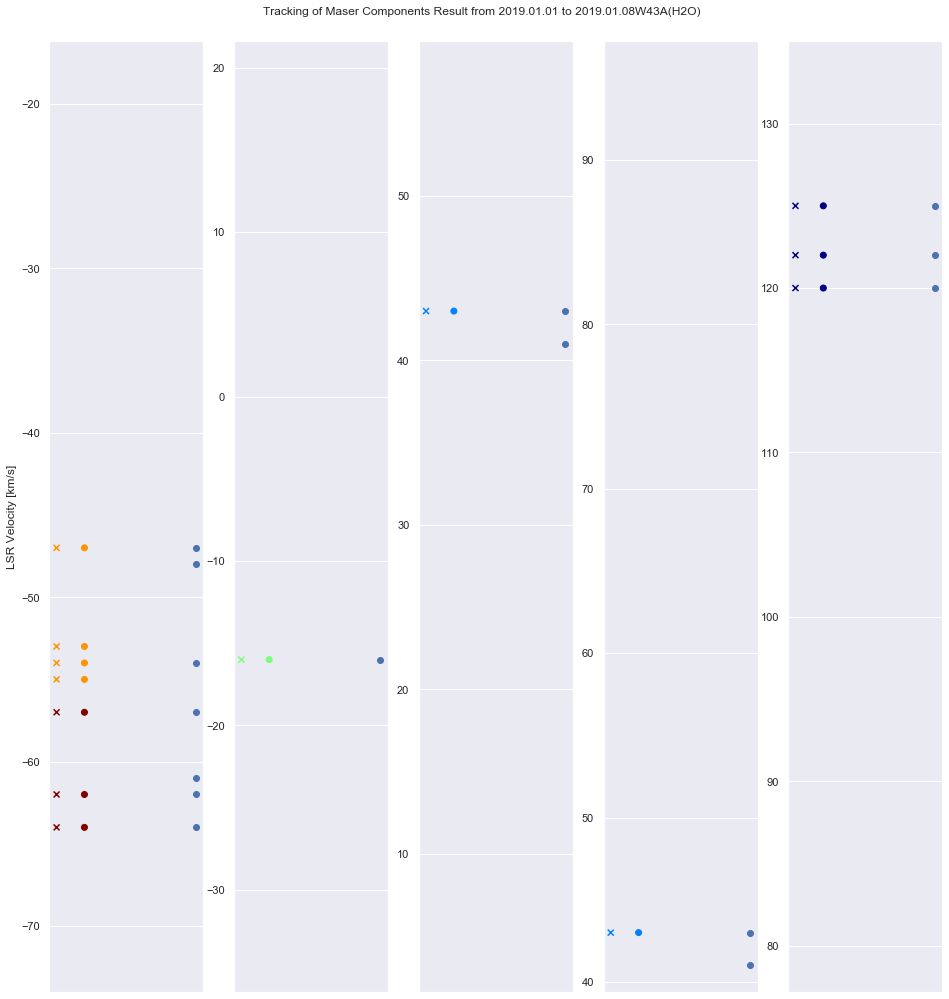

Average P = 0.2179778279236578


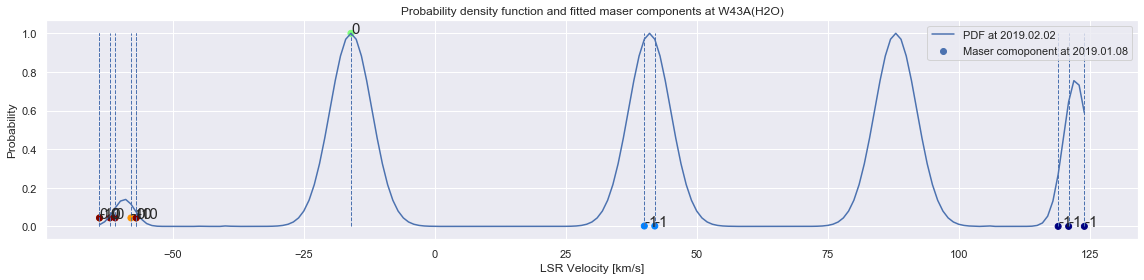

Change: -10, 0, 0, 0, -10, -10, 0, 0, -1, -1, -1, -1, -1


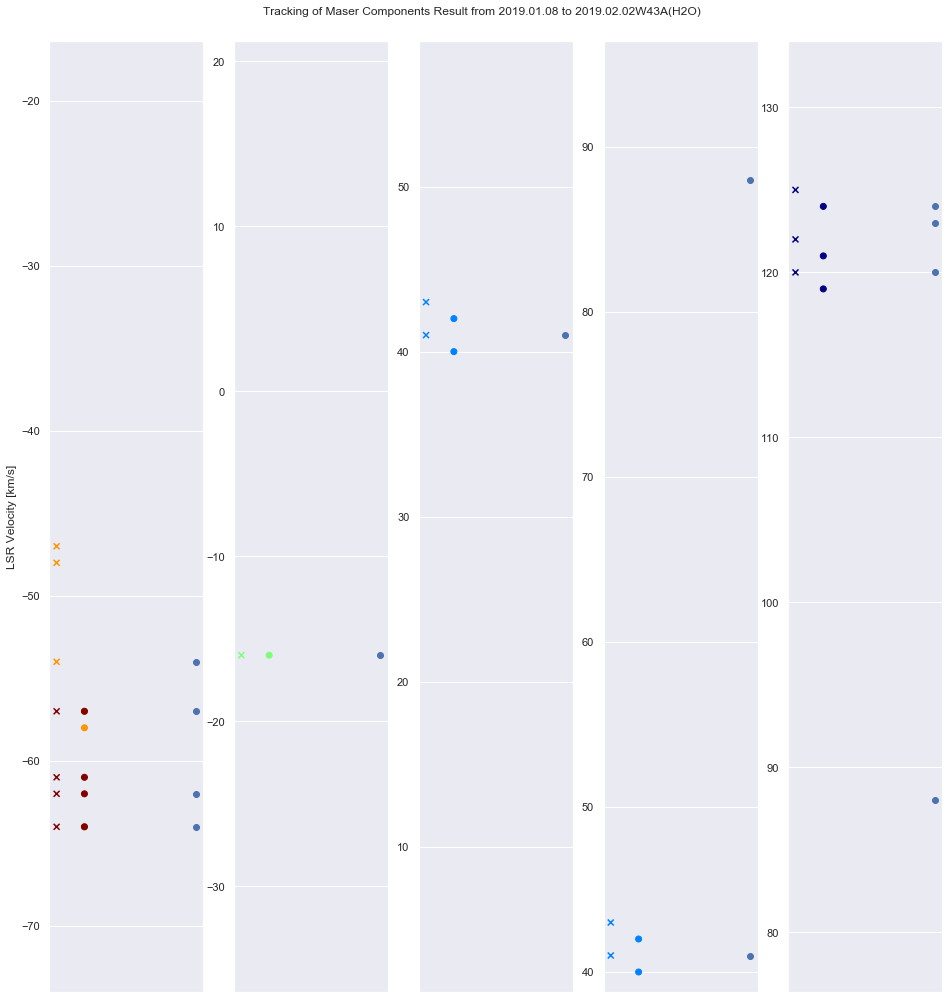

Average P = 0.6743112312932725


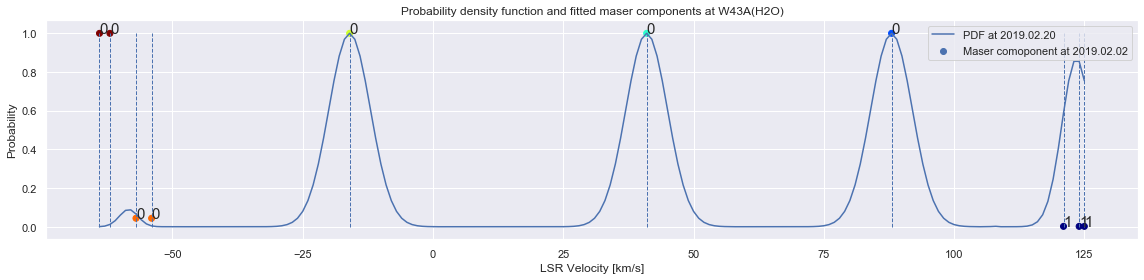

Change: 0, 0, 0, 0, 0, 0, 0, 1, 1, 1


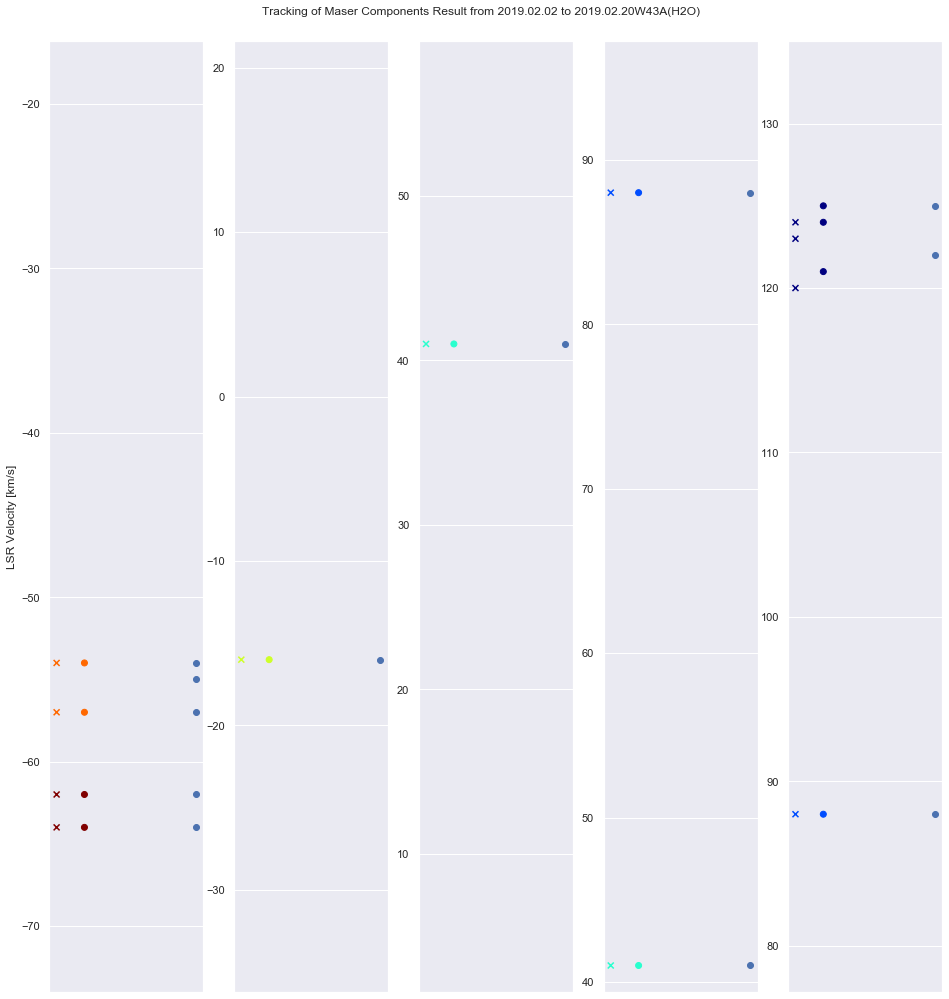

Average P = 0.6087873881635081


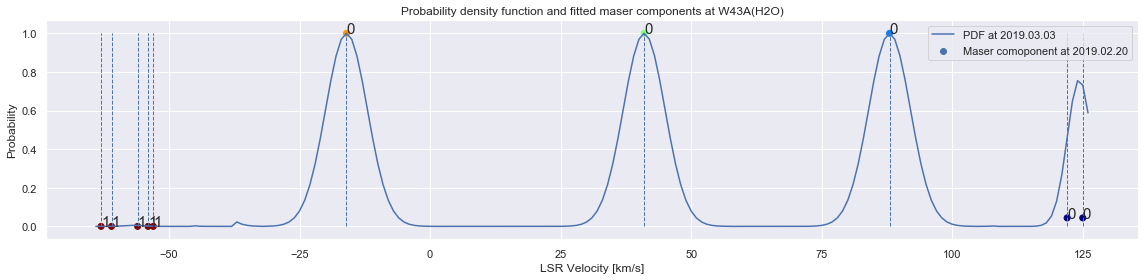

Change: 1, 1, 1, 1, 1, 0, 0, 0, 0, 0


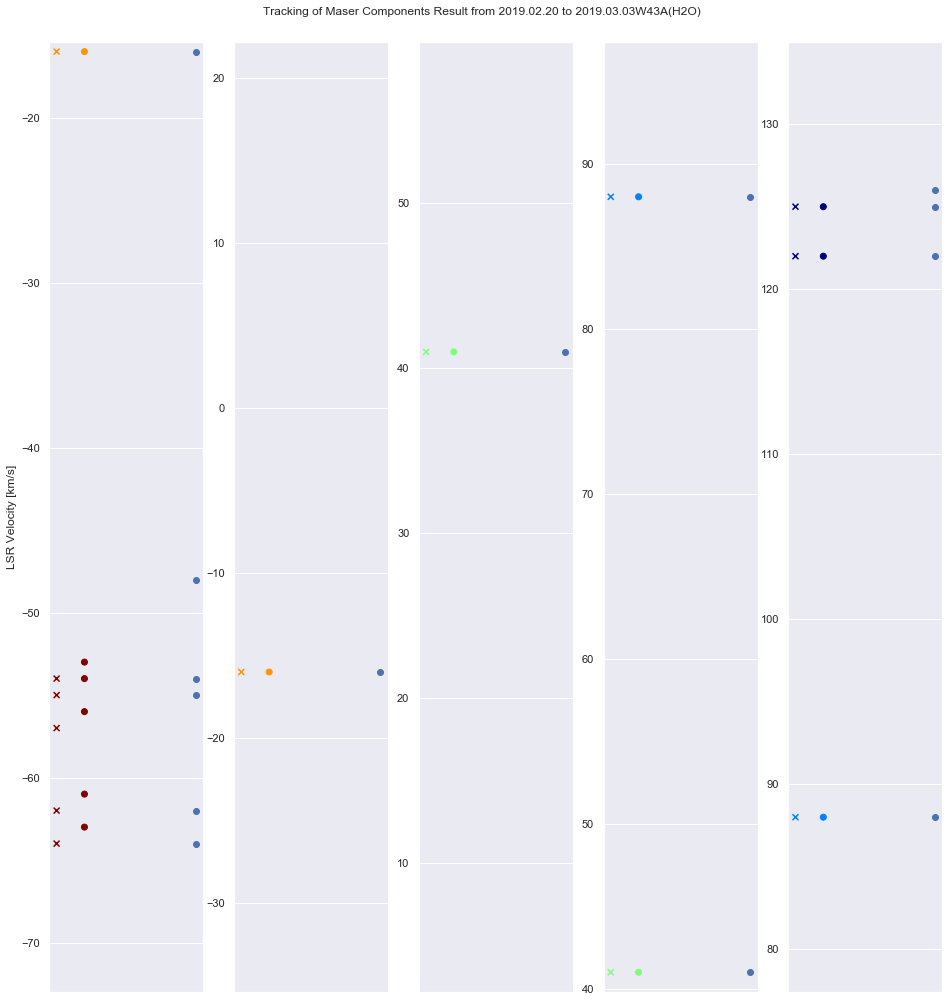

Average P = 0.5073228222705679


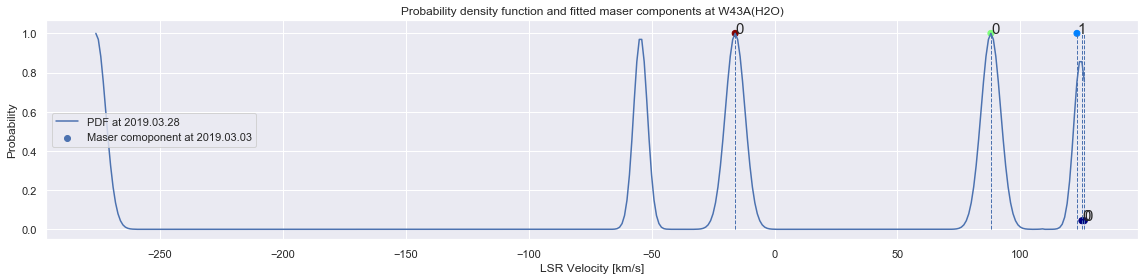

Change: 0, 0, 1, 0, 0


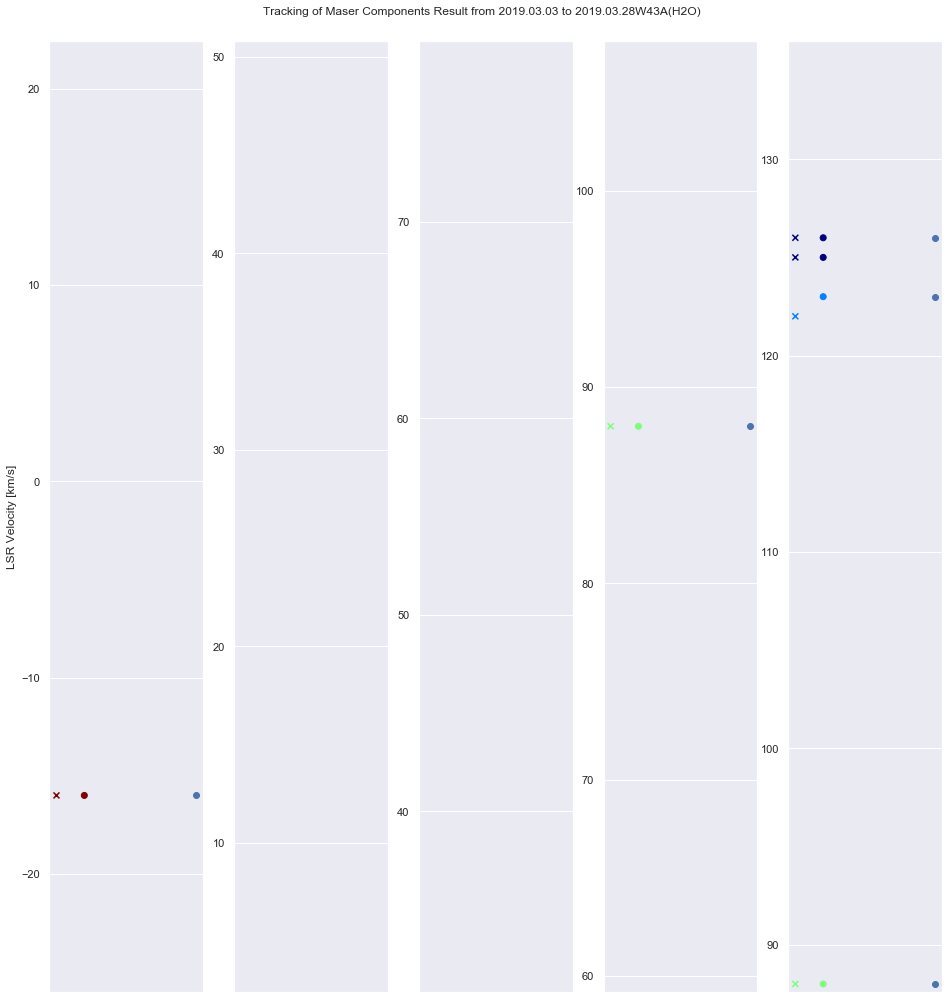

IndexError: list index out of range

In [6]:
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
# v_resolution = 0.1
v_resolution = 1

def bin_to_f(lists, sigma):
    def gaussian(x, sigma):
#             print(math.exp(-1 * (x*x) / (2 * sigma*sigma)))
        return math.exp(-1 * (x*x) / (2 * sigma*sigma))
#         return_lis = [float(val) for val in lists]
    return_lis = [0] * len(lists)
    for i in range(len(lists)):
#             print(i)
        if lists[i] == 1:
            if return_lis[i] == 0:
                return_lis[i] = gaussian(0, sigma)
            else:
                return_lis[i] *= gaussian(0, sigma)
            for j in range(-1 * i, len(lists) - i):

                if j == 0: continue
#                     if gaussian(lists[i + j] - lists[i], sigma) <= 0.01: continue
                if math.fabs(j) <= sigma * 4:
#                         print(i + j)
                    if return_lis[i + j] == 0:
                        return_lis[i + j] = gaussian(j, sigma)
                    else:
                        return_lis[i + j] *= gaussian(j, sigma)
#             for j in range(-1, -1 * i - 1, -1):
# #                 print(i,j)
#                 if gaussian(lists[i + j] - lists[i], sigma) <= 0.01: break
#                 return_lis[i + j] *= gaussian(lists[i + j] - lists[i], sigma)
#         print(return_lis, len(return_lis))
    return return_lis

def compare_lis(lisA, lisB, sigma, AminusB, lim = 30):
    
    
    lis2 = bin_to_f(lisB, sigma)
#     plt.plot([i for i in range(len(lis2))], lis2)
#     plt.show()
#     print(lis2)
    diff = []
#     print(len(lisB), len(lisA))
#     print(len(lisB) - len(lisA) + 1)
    count = 0
    for i in range(0, len(lisB) - len(lisA) + 1):
        tmp_diff = 1
#         print(AminusB)
#         print(math.fabs(i - AminusB))
#         print(i)
        count += 1
        if math.fabs(i - AminusB) <= lim:
#         if True:
            
            for j in range(len(lisA)):
#                 print(j, end = ', ')
#                 print(str(lis2[j + i]) + '*' + str(lisA[j]))
                if lisA[j] != 0:
                    tmp_diff *= lis2[j + i] * lisA[j]
#                 print(tmp_diff)
#             print(i - AminusB, tmp_diff)
            diff.append([tmp_diff, i - AminusB])
#         print(diff)
#     print(count)
#     print(len(diff))
#     max_val = max(diff, key=lambda x:x[0])
#     print(diff)


#     plt.plot([s[1] for s in diff], [s[0] for s in diff])
#     plt.show()
#     if len(diff) == 0:
#         return 0, [0]
    max_val = diff[0]
    tmp_max_lis = []
    for tmp_lis in diff:
#         print(tmp_lis)
        if tmp_lis[0] > max_val[0]:
            max_val = tmp_lis
        elif max_val[0] == tmp_lis[0] and math.fabs(tmp_lis[1]) <= math.fabs(max_val[1]):
            max_val = tmp_lis
#         if tmp_lis[0] == max_val[0]:
#             tmp_max_lis.append(tmp_lis)
    return max_val, diff

def peaklist_to_peakfunc(lis):
    lists = sorted(lis)
#     lists = [int(val) for val in in_lists]
    return_lists = [0] * (max(lists) - min(lists) + 1)
#     print(len(return_lists))
    for i in range(max(lists) - min(lists) + 1):
        if i + min(lists) in lists:
#             print(i)
            return_lists[i] = 1
#             return_lists[i] = lists[i]
    return return_lists
        
    
data = dict(sorted(sep_date(result).items(), key=lambda x:x[0]))
data_keys = list(data.keys())
# print(data)
# for i in range(1, len(data_keys)):
for key in data.keys():
    for i in range(len(data[key])):
        data[key][i][0] = int(Decimal(str(data[key][i][0] / v_resolution)).quantize(Decimal('0'), rounding=ROUND_HALF_UP))
    





for i in range(1, len(data_keys)):
# for i in range(0, 1):
    x1 = []
    y1 = []
    diffy = []
    y1_raw = []
    clabel1 = []
    d_list = []
    max_diff_list = []
    data_cluster_num = {}   
    
    for lis in data[data_keys[i - 1]]:
#     for lis in data[data_keys[i]]:
        if not lis[1] in data_cluster_num.keys():
            data_cluster_num[lis[1]] = [lis[0]]
        else:
            data_cluster_num[lis[1]].append(lis[0])
    j = 0
    B = peaklist_to_peakfunc([s[0] for s in data[data_keys[i]]])
    
    x0 = np.linspace(min([s[0] for s in data[data_keys[i]]])*v_resolution, max([s[0] for s in data[data_keys[i]]])*v_resolution, len(bin_to_f(B, 4)))
    y0 = bin_to_f(B, 4)
#     plt.figure(figsize = (16,4))
#     plt.plot(, )
#     plt.show()
    
#     print(B, len(B))
    centB = min([s[0] for s in data[data_keys[i]]])
#     print('B = ' + str(centB))
    for key, lis in data_cluster_num.items():
        centA = min(lis)
#         print('A = ' + str(centA))
#         print('d = ' + str((centA - centB)))
        A = peaklist_to_peakfunc(lis)
#         if len(A) > 1:
        if True:
            diff, diff_lis = compare_lis(A, B, 0.4 / v_resolution, (centA - centB), 10 / v_resolution)
            diff = [s * v_resolution for s in diff]
            diff_lis = [[s[0]+v_resolution, s[1]*v_resolution] for s in diff_lis]
            max_diff_list.append(diff[0])
#             print('P = ' + str(diff[0]) + ', ' + 'd = ' + str(diff[1]))
            if not diff[0] == 0:
                x1.extend([data_keys[i] - 1] * len(lis))
                y1.extend([lis[i] * v_resolution + float(diff[1]) for i in range(0, len(lis))])
                diffy.extend([diff[0]] * len(lis))
                clabel1.extend([j] * len(lis))  
                d_list.extend([diff[1]] * len(lis))
                y1_raw.extend([lis[i] * v_resolution for i in range(0, len(lis))])

        j += 1
        
    print('Average P = ' + str(sum(max_diff_list) / len(max_diff_list)))
#     print(y1)
    print_d = []
    fig = plt.figure(figsize = (16,4))
    plt.title('Probability density function and fitted maser components at ' + source[0] + '(' + source[1] + ')')
    ax1 = fig.add_subplot(1,1,1)
    ax1.plot(x0, y0, label = 'PDF at ' + str(ut.mjd2datetime(int(data_keys[i])).strftime("%Y.%m.%d")))
    ax1.vlines(y1, min(y0), max(y0), edgecolors = 'b', linewidth = 1, linestyle='dashed')
    ax1.scatter(y1, diffy, c = clabel1, cmap = 'jet', label = 'Maser comoponent at ' + str(ut.mjd2datetime(int(data_keys[i-1])).strftime("%Y.%m.%d")))
    ax1.set_xlabel('LSR Velocity [km/s]')
    ax1.set_ylabel('Probability')
    for u, v, lab in zip(y1, diffy, d_list):
        ax1.annotate(str(lab), xy = (u, v), fontsize = 15)
        print_d.append([u, lab])
    ax1.legend()
    fig.tight_layout()
    plt.show()
    
    print('Change: ' + ', '.join([str(s[1]) for s in sorted(print_d, key=lambda x:x[0])]))
    
    
    fig = plt.figure(figsize = (16,16))

    ax = []
    n = 5
    for j in range(0, n):
        ren = (max(y1) - min(y1)) / n
        ax.append(fig.add_subplot(1,n,j + 1))
        ax[j].set_ylim(min(y1) - 10 + ren * j, min(y1) + 10 + ren + ren * j)
        ax[j].scatter([s + 0.2 for s in x1], y1, c = clabel1, cmap = 'jet')
        ax[j].scatter(x1, y1_raw, c = clabel1, cmap = 'jet', marker = 'x')
#         ax[j].quiver(x1, y1_raw, [0.2 for s in x1], [t-s for s,t in zip(y1_raw, y1)],angles = 'xy', scale_units = 'xy', scale = 1)
        x2 = [data_keys[i]] * len(data[data_keys[i]])
        y2 = [float(s[0]) * v_resolution for s in data[data_keys[i]]]
        ax[j].scatter(x2, y2)
        ax[j].set_xticks([])
    ax[0].set_ylabel('LSR Velocity [km/s]')
    fig.suptitle('Tracking of Maser Components Result from ' + str(ut.mjd2datetime(int(data_keys[i-1])).strftime("%Y.%m.%d")) + ' to ' + str(ut.mjd2datetime(int(data_keys[i])).strftime("%Y.%m.%d")) + source[0] + '(' + source[1] + ')')
    fig.subplots_adjust(top = 0.95, hspace = 0.95)
#     fig.tight_layout() 
    plt.show()
    
    

#     df = 0
#     for x, y in zip(sorted(y1), sorted(y2)):
#     #     print(x,y)
#         df += math.fabs(y - x)
#     print(df)


        
            

